In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

In [2]:
def polynomial(n, alpha, beta):
    return alpha * beta * n**3 - alpha * n**2 + (1 + alpha * beta) * n - alpha

In [3]:
alpha = np.linspace(0.2, 0.8, 10)
n = np.linspace(0, 8, 1000)
beta = 1./8.

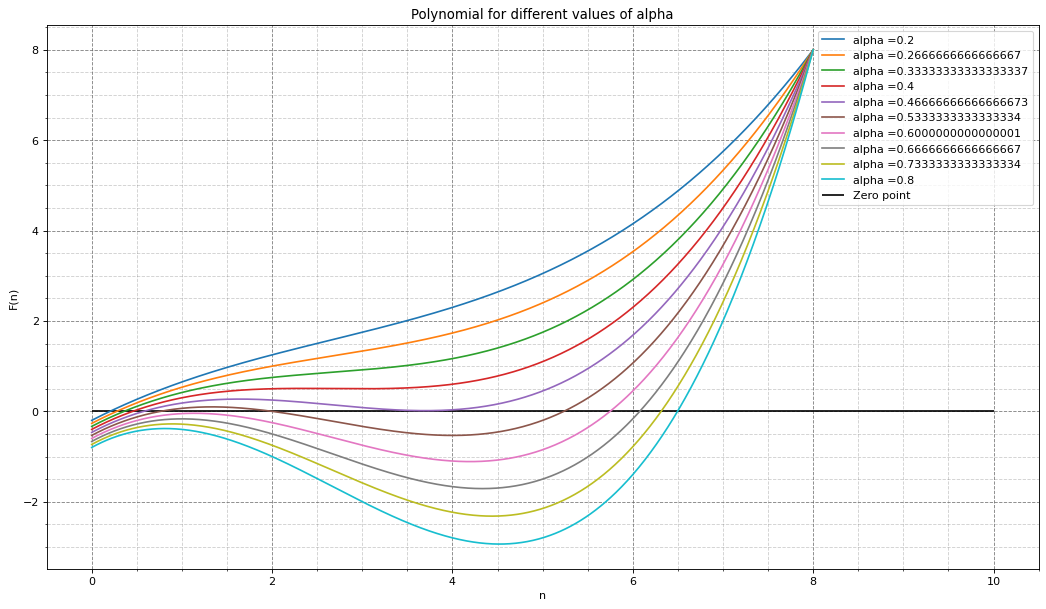

In [4]:
plt.figure(figsize=(16, 9), dpi=80)
for itr in alpha:
    plt.plot(n, polynomial(n, itr, beta), label="alpha =" + str(itr))
plt.xlabel("n")
plt.ylabel('F(n)')
plt.title('Polynomial for different values of alpha')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()
plt.hlines(0, 0, 10, label="Zero point", color="black")
plt.legend()

#### Finding alpha such that roots are present
We can see that alpha needs to be around 0.5 for three roots to exist, so we will plot again with other alpha values

In [5]:
alpha = np.linspace(0.46, 0.6, 6)

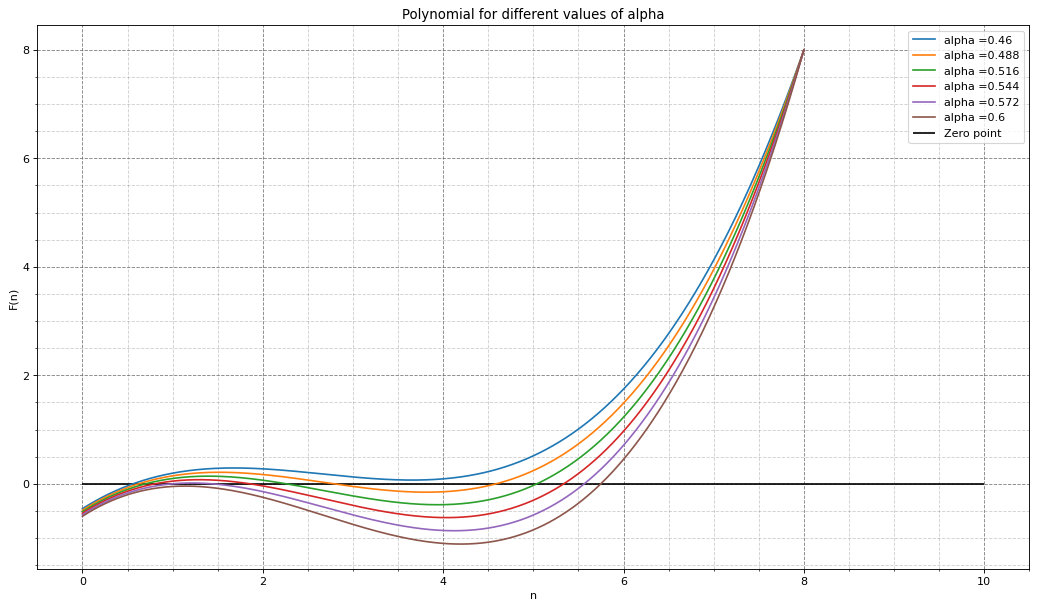

In [6]:
plt.figure(figsize=(16, 9), dpi=80)
for itr in alpha:
    plt.plot(n, polynomial(n, itr, beta), label="alpha =" + str(itr))
plt.xlabel("n")
plt.ylabel('F(n)')
plt.title('Polynomial for different values of alpha')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()
plt.hlines(0, 0, 10, label="Zero point", color="black")
plt.legend()

alpha = 0.46 and alpha = 0.6 seem to be slightly outside the relevant range

#### Finding stable stationary points

In [7]:
# for the point to be stationary, we need to check the second derivative:
def sec_derivative(n,alpha,beta):
    return -alpha*beta - 1/(1+n**2) + 2*n**2 / (1+n**2)**2

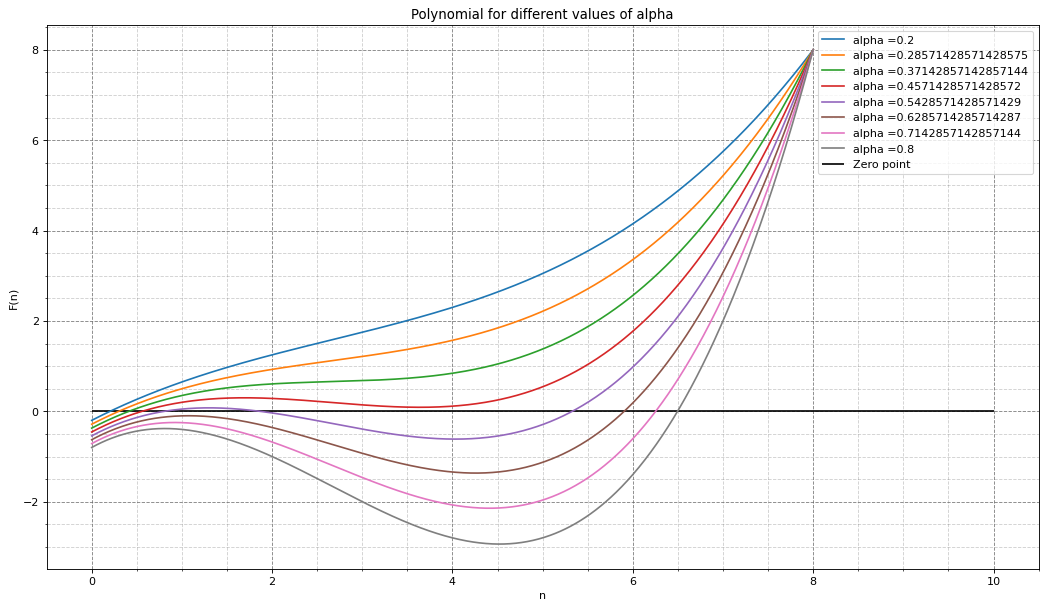

In [8]:
# first, lets define the alpha values we want to investigate
# we tried 10 values for alpha, but it was hard to get values where the root calculation converged every time, which is why we only chose 8 values
alpha = np.linspace(0.2, 0.8, 8)

# once again plot for these alphas
plt.figure(figsize=(16, 9), dpi=80)
for itr in alpha:
    plt.plot(n, polynomial(n, itr, beta), label="alpha =" + str(itr))
plt.xlabel("n")
plt.ylabel('F(n)')
plt.title('Polynomial for different values of alpha')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()
plt.hlines(0, 0, 10, label="Zero point", color="black")
plt.legend()

In [9]:
# now, lets loop over these alpha values
for alphaitr in alpha:
    print("Beginning calculation for alpha=" + str(alphaitr))
    # find all roots and check the stability with the second derivative
    # we will use scipy
    if(alphaitr > 0.46 and alphaitr < 0.6):
        zeropoint1 = root_scalar(polynomial, args=(alphaitr, beta), method="brentq", bracket=[0., 1.8], x0=[0.5])
        zeropoint2 = root_scalar(polynomial, args=(alphaitr, beta), method="brentq", bracket=[1., 4.], x0=[2.])
        zeropoint3 = root_scalar(polynomial, args=(alphaitr, beta), method="brentq", bracket=[4., 6.], x0=[5.])
        print(zeropoint1)
        sec_der1 = sec_derivative(zeropoint1.root, alphaitr, beta)
        stability1 = sec_der1 < 0
        print("Second derivative:", sec_der1)
        print("Stability:", stability1)
        print(zeropoint2)
        sec_der2 = sec_derivative(zeropoint2.root, alphaitr, beta)
        stability2 = sec_der2 < 0
        print("Second derivative:", sec_der2)
        print("Stability:", stability2)
        print(zeropoint3)
        sec_der3 = sec_derivative(zeropoint3.root, alphaitr, beta)
        stability3 = sec_der3 < 0
        print("Second derivative:", sec_der3)
        print("Stability:", stability3)
        
    else:
        zeropoint = root_scalar(polynomial, args=(alphaitr, beta), method="brentq", bracket=[0., 10.], x0=[5.])
        print(zeropoint)
        sec_der = sec_derivative(zeropoint.root, alphaitr, beta)
        stability = sec_der < 0
        print("Second derivative:", sec_der)
        print("Stability:", stability)
        
    print("----------------------------------------")
    print("----------------------------------------")

Beginning calculation for alpha=0.2
      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.2029552901859836
Second derivative: -0.9094463304499325
Stability: True
----------------------------------------
----------------------------------------
Beginning calculation for alpha=0.28571428571428575
      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 0.299713959172081
Second derivative: -0.8020286476139646
Stability: True
----------------------------------------
----------------------------------------
Beginning calculation for alpha=0.37142857142857144
      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: 0.412131956512484
Second derivative: -0.6530150615597603
Stability: True
----------------------------------------
----------------------------------------
Beginning calculation for alpha=0.4571428571428572
      converged: True
  